In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame

%matplotlib inline

In [2]:
load_dotenv()

True

In [65]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [66]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-31', tz='America/New_York').isoformat()

In [67]:
# Get 5 years' worth of historical data for "Heavy Hitters" AAPL, MSFT, GOOG, GOOGL, AMZN, META
# Set timeframe to "1Day"
timeframe = "1Day"


# Set the ticker information
tickers = ["AAPL","MSFT","GOOG","GOOGL","AMZN","META","SPY"]


hh_5_year = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

hh_5_year

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-10-31 04:00:00+00:00,167.900,169.6499,166.940,169.04,36070445,199384,168.609022,AAPL
2017-11-01 04:00:00+00:00,169.870,169.9400,165.610,166.89,33638072,209941,167.188415,AAPL
2017-11-02 04:00:00+00:00,167.640,168.5000,165.280,168.11,41394328,249912,168.444532,AAPL
2017-11-03 04:00:00+00:00,174.000,174.2600,171.120,172.50,59402471,336014,172.719018,AAPL
2017-11-06 05:00:00+00:00,172.365,174.9900,171.720,174.25,35026850,194183,173.981439,AAPL
...,...,...,...,...,...,...,...,...
2022-10-25 04:00:00+00:00,378.790,385.2500,378.671,384.92,78656471,598158,382.991850,SPY
2022-10-26 04:00:00+00:00,381.620,387.5800,381.350,382.02,103779972,657066,383.877161,SPY
2022-10-27 04:00:00+00:00,383.070,385.0000,379.330,379.98,81650038,599316,381.339490,SPY


In [68]:
# Reorganize the DataFrame
# Separate ticker data
AAPL = hh_5_year[hh_5_year['symbol']=='AAPL'].drop('symbol', axis=1)
MSFT = hh_5_year[hh_5_year['symbol']=='MSFT'].drop('symbol',axis=1)
GOOG = hh_5_year[hh_5_year['symbol']=='GOOG'].drop('symbol',axis=1)
GOOGL =hh_5_year[hh_5_year['symbol']=='GOOGL'].drop('symbol',axis=1)
AMZN = hh_5_year[hh_5_year['symbol']=='AMZN'].drop('symbol', axis=1)
META = hh_5_year[hh_5_year['symbol']=='META'].drop('symbol', axis=1)
SPY=hh_5_year[hh_5_year['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
hh_5_year = pd.concat([AAPL, MSFT,GOOG,GOOGL,AMZN,META,SPY],axis=1, keys=['AAPL','MSFT','GOOG','GOOGL','AMZN','META','SPY'])


# Display sample data
hh_5_year.head(10)

AAPL                                      \
                              open      high     low   close    volume   
timestamp                                                                
2017-10-31 04:00:00+00:00  167.900  169.6499  166.94  169.04  36070445   
2017-11-01 04:00:00+00:00  169.870  169.9400  165.61  166.89  33638072   
2017-11-02 04:00:00+00:00  167.640  168.5000  165.28  168.11  41394328   
2017-11-03 04:00:00+00:00  174.000  174.2600  171.12  172.50  59402471   
2017-11-06 05:00:00+00:00  172.365  174.9900  171.72  174.25  35026850   
2017-11-07 05:00:00+00:00  173.910  175.2500  173.60  174.81  24614898   
2017-11-08 05:00:00+00:00  174.660  176.2400  174.33  176.24  24410342   
2017-11-09 05:00:00+00:00  175.110  176.0950  173.14  175.88  29984729   
2017-11-10 05:00:00+00:00  175.110  175.3800  174.27  174.67  25145721   
2017-11-13 05:00:00+00:00  173.510  174.5000  173.40  173.97  17009480   

                                                    MSFT                   \
                          trade_count        vwap   open    high      low   
timestamp                                                                   
2017-10-31 04:00:00+00:00      199384  168.609022  84.36  84.360  83.1100   
2017-11-01 04:00:00+00:00      209941  167.188415  83.68  83.760  82.8800   
2017-11-02 04:00:00+00:00      249912  168.444532  83.35  84.460  83.1200   
2017-11-03 04:00:00+00:00      336014  172.719018  84.08  84.540  83.4000   
2017-11-06 05:00:00+00:00      194183  173.981439  84.20  84.700  84.0825   
2017-11-07 05:00:00+00:00      145916  174.621145  84.77  84.900  83.9300   
2017-11-08 05:00:00+00:00      135164  175.506000  84.14  84.610  83.8300   
2017-11-09 05:00:00+00:00      167083  175.082829  84.11  84.270  82.9000   
2017-11-10 05:00:00+00:00      114343  174.830655  83.79  84.095  83.2300   
2017-11-13 05:00:00+00:00      113812  174.031218  83.67  83.940  83.4600   

                           ...      META                             SPY  \
                           ...    volume trade_count        vwap    open   
timestamp                  ...                                             
2017-10-31 04:00:00+00:00  ...  20174231      139067  179.879978  257.18   
2017-11-01 04:00:00+00:00  ...  40920320      261019  182.207518  258.04   
2017-11-02 04:00:00+00:00  ...  35626323      226731  179.227273  257.41   
2017-11-03 04:00:00+00:00  ...  17832597      114335  178.427136  257.77   
2017-11-06 05:00:00+00:00  ...  13397211       85235  179.170643  258.30   
2017-11-07 05:00:00+00:00  ...  12953182       78179  179.930625  258.97   
2017-11-08 05:00:00+00:00  ...  10771541       61672  179.732469  258.47   
2017-11-09 05:00:00+00:00  ...  12610535       86626  178.273579  257.73   
2017-11-10 05:00:00+00:00  ...  11145189       69501  178.483679  257.73   
2017-11-13 05:00:00+00:00  ...   9523447       58475  178.553188  257.30   

                                                                              \
                               high      low     close    volume trade_count   
timestamp                                                                      
2017-10-31 04:00:00+00:00  257.4400  256.805  257.1200  60678916      162728   
2017-11-01 04:00:00+00:00  258.4300  257.070  257.5000  54263336      193085   
2017-11-02 04:00:00+00:00  257.7500  256.190  257.6200  56449535      217328   
2017-11-03 04:00:00+00:00  258.5000  257.300  258.4500  62908639      189765   
2017-11-06 05:00:00+00:00  259.0000  258.220  258.8100  54815449      130424   
2017-11-07 05:00:00+00:00  259.3500  258.090  258.7000  57515699      170176   
2017-11-08 05:00:00+00:00  259.2200  258.150  259.1100  50514789      160009   
2017-11-09 05:00:00+00:00  258.3900  256.360  258.1908  95115637      349621   
2017-11-10 05:00:00+00:00  258.2926  257.370  258.1000  59984662      176651   
2017-11-13 05:00:00+00:00  258.5900  257.270  258.3400  51392695      149087   

                                   

In [69]:
# Create and empty DataFrame for closing prices
hh_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
hh_closing_prices["AAPL"] = hh_5_year["AAPL"]["close"]
hh_closing_prices["MSFT"] = hh_5_year["MSFT"]["close"]
hh_closing_prices["GOOG"] = hh_5_year["GOOG"]["close"]
hh_closing_prices["GOOGL"] = hh_5_year["GOOGL"]["close"]
hh_closing_prices["AMZN"] = hh_5_year["AMZN"]["close"]
hh_closing_prices["META"] = hh_5_year["META"]["close"]
hh_closing_prices["SPY"] = hh_5_year["SPY"]["close"]
# Drop the time component of the date
hh_closing_prices.index = hh_closing_prices.index.date

# Display sample data
hh_closing_prices.head(10)

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
2017-10-31,169.04,83.18,1016.64,1033.040,1105.28,180.06,257.1200
2017-11-01,166.89,83.18,1025.50,1042.595,1103.68,182.66,257.5000
2017-11-02,168.11,84.05,1025.58,1042.970,1094.22,178.92,257.6200
2017-11-03,172.50,84.14,1032.48,1049.990,1111.60,178.92,258.4500
2017-11-06,174.25,84.47,1025.90,1042.680,1120.66,180.17,258.8100
2017-11-07,174.81,84.27,1033.33,1052.390,1123.17,180.25,258.7000
2017-11-08,176.24,84.56,1039.85,1058.290,1132.88,179.56,259.1100
2017-11-09,175.88,84.09,1031.26,1047.720,1129.13,179.30,258.1908
2017-11-10,174.67,83.87,1028.07,1044.150,1125.35,178.46,258.1000
2017-11-13,173.97,83.93,1025.75,1041.200,1129.17,178.77,258.3400


In [83]:
# Slice Heavy Hitters Portfolio
hh_portfolio = hh_closing_prices[['AAPL','MSFT','GOOG','AMZN','META']].pct_change()

hh_portfolio

,AAPL,MSFT,GOOG,AMZN,META
2017-10-31,NaN,NaN,NaN,NaN,NaN
2017-11-01,-0.012719,0.000000,0.008715,-0.001448,0.014440
2017-11-02,0.007310,0.010459,0.000078,-0.008571,-0.020475
2017-11-03,0.026114,0.001071,0.006728,0.015883,0.000000
2017-11-06,0.010145,0.003922,-0.006373,0.008150,0.006986
...,...,...,...,...,...
2022-10-25,0.019338,0.013792,0.019035,0.006510,0.060052
2022-10-26,-0.019627,-0.077156,-0.096350,-0.040962,-0.055923
2022-10-27,-0.030465,-0.019756,-0.023413,-0.040636,-0.245571
2022-10-28,0.075552,0.040221,0.042981,-0.068043,0.012865


In [82]:
# Slice S&P 500 Portfolio and calculate return

sp500_portfolio = hh_closing_prices[['SPY']].pct_change()

sp500_portfolio



,SPY
2017-10-31,NaN
2017-11-01,0.001478
2017-11-02,0.000466
2017-11-03,0.003222
2017-11-06,0.001393
...,...
2022-10-25,0.015969
2022-10-26,-0.007534
2022-10-27,-0.005340
2022-10-28,0.023791


Conduct Quantitative Analysis for All Portfolios

Performance Analysis

In [70]:
# Calculate Daily Returns

hh_daily_return = hh_closing_prices.pct_change()

hh_daily_return

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,-0.012719,0.000000,0.008715,0.009249,-0.001448,0.014440,0.001478
2017-11-02,0.007310,0.010459,0.000078,0.000360,-0.008571,-0.020475,0.000466
2017-11-03,0.026114,0.001071,0.006728,0.006731,0.015883,0.000000,0.003222
2017-11-06,0.010145,0.003922,-0.006373,-0.006962,0.008150,0.006986,0.001393
...,...,...,...,...,...,...,...
2022-10-25,0.019338,0.013792,0.019035,0.019118,0.006510,0.060052,0.015969
2022-10-26,-0.019627,-0.077156,-0.096350,-0.091405,-0.040962,-0.055923,-0.007534
2022-10-27,-0.030465,-0.019756,-0.023413,-0.028547,-0.040636,-0.245571,-0.005340
2022-10-28,0.075552,0.040221,0.042981,0.044134,-0.068043,0.012865,0.023791


<AxesSubplot:>

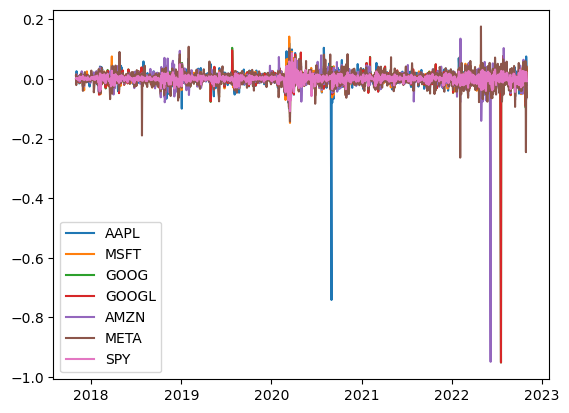

In [71]:
# Plot the daily returns
hh_return_plot = hh_daily_return.plot()

hh_return_plot

CALCULATE AND PLOT CUMULATIVE RETURNS OF ALL PORTFOLIOS

In [94]:
# Calculate Cumulative returns

hh_cumulative_returns = (1 + hh_daily_return).cumprod()

hh_cumulative_returns

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,0.987281,1.000000,1.008715,1.009249,0.998552,1.014440,1.001478
2017-11-02,0.994498,1.010459,1.008794,1.009612,0.989993,0.993669,1.001945
2017-11-03,1.020469,1.011541,1.015581,1.016408,1.005718,0.993669,1.005173
2017-11-06,1.030821,1.015509,1.009108,1.009332,1.013915,1.000611,1.006573
...,...,...,...,...,...,...,...
2022-10-25,0.901207,3.013465,0.103213,0.101138,0.109113,0.763690,1.497044
2022-10-26,0.883519,2.780957,0.093268,0.091894,0.104643,0.720982,1.485765
2022-10-27,0.856602,2.726016,0.091084,0.089271,0.100391,0.543930,1.477831
2022-10-28,0.921320,2.835658,0.094999,0.093210,0.093560,0.550927,1.512990


<AxesSubplot:>

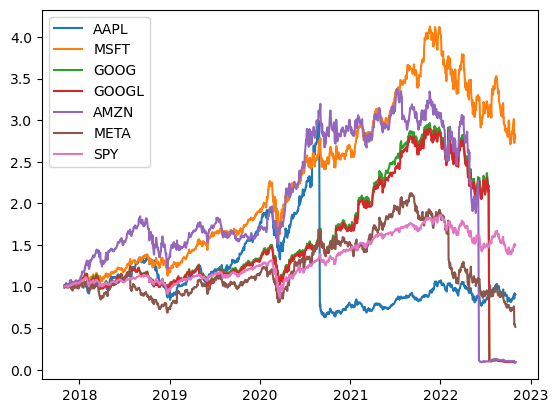

In [95]:
# Plot Cumulative returns

hh_cumulative_returns_plot = hh_cumulative_returns.plot()

hh_cumulative_returns_plot

Risk Analysis
Determine the risk of each portfolio:

Create a box plot for Heavy Hitters and S&P 500 portfolios
Calculate the standard deviation for Heavy Hitters portfolio
Determine whether Heavy Hitters portfolio is riskier than the S&P 500
Calculate the Annualized Standard Deviation

<AxesSubplot:>

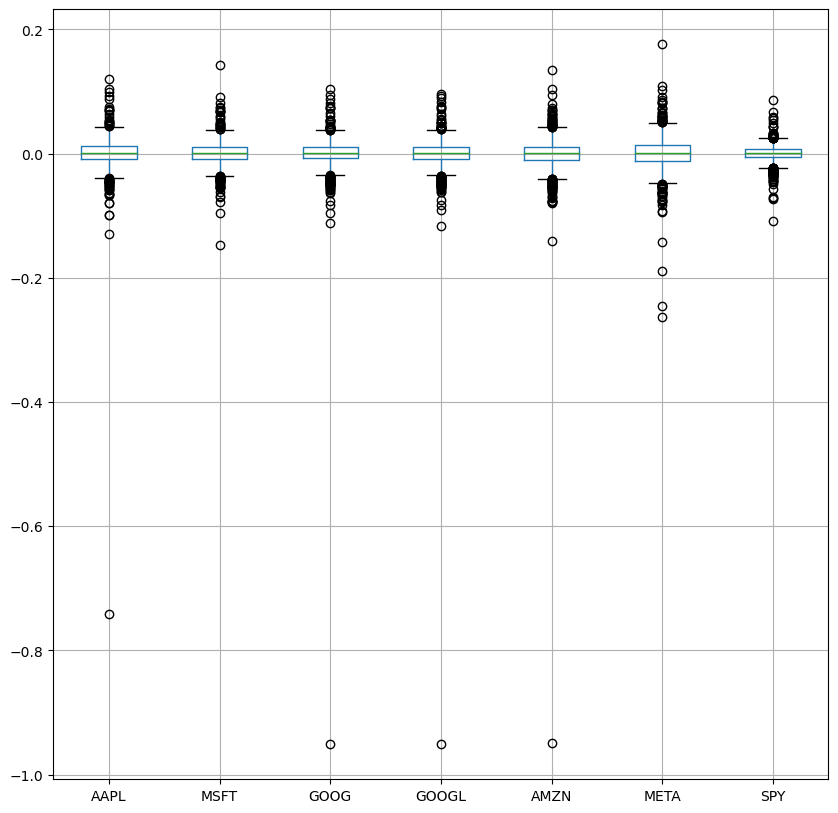

In [97]:
# Create boxplot for Heavy Hitters Portfolio
hh_daily_return.boxplot(figsize=(10,10))

Calculate Standard Deviations and determine risks versus S&P 500

In [90]:
# Calculate the standard deviations 

hh_std = hh_daily_return.std()
hh_std = hh_std.sort_values(ascending = False)
hh_std

AMZN     0.034607
GOOGL    0.033042
GOOG     0.033029
AAPL     0.029392
META     0.026635
MSFT     0.019160
SPY      0.013085
dtype: float64

In [91]:
#Create Summary Statistics 
hh_summary = hh_daily_return.describe()

hh_summary

,AAPL,MSFT,GOOG,GOOGL,AMZN,META,SPY
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.000622,0.001000,-0.000056,-0.000070,-0.000039,-0.000157,0.000410
std,0.029392,0.019160,0.033029,0.033042,0.034607,0.026635,0.013085
min,-0.741522,-0.147464,-0.951267,-0.951229,-0.949003,-0.263901,-0.107828
25%,-0.008482,-0.007879,-0.007531,-0.008034,-0.009587,-0.011466,-0.004892
50%,0.000922,0.001094,0.001072,0.000995,0.001367,0.000414,0.000921
75%,0.012291,0.010819,0.010690,0.010546,0.011398,0.013214,0.006888
max,0.119808,0.142268,0.104485,0.096202,0.135359,0.176138,0.086761


In [98]:
# Calculate the annualized standard deviation (252 trading days)
import numpy as np

annual_std = hh_std * np.sqrt(252)

annual_std

AMZN     0.549371
GOOGL    0.524532
GOOG     0.524323
AAPL     0.466587
META     0.422811
MSFT     0.304163
SPY      0.207713
dtype: float64